In [4]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.DataFrame(columns=[0, 1], data=[[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]])
print(dataset)


   0   1
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


In [27]:
def gradient_descent(x, y, learning_rate, epochs):
    x1 = 0
    x0 = 0
    m = len(x) 
    cost_history = []
    for _ in range(epochs):
        y_pred = [x1 * x[i] + x0 for i in range(m)]
        cost = (1/m) * sum([val**2 for val in ((y[i] - y_pred[i]) for i in range(m))])
        cost_history.append(cost)
        x1_gradient = -(2/m) * sum((x[i] * (y[i] - y_pred[i])) for i in range(m))
        x0_gradient = -(2/m) * sum((y[i] - y_pred[i]) for i in range(m))
        x1 = x1 - learning_rate * x1_gradient
        x0 = x0 - learning_rate * x0_gradient
    return x1, x0, cost_history

In [36]:
def stochastic_gradient_descent(x, y, learning_rate, epochs):
    x1 = 0
    x0 = 0
    m = len(x)
    cost_history = []
    for _ in range(epochs):
        for i in range(m):
            y_pred = x1 * x[i] + x0
            x1_gradient = -(2/m) * x[i] * (y[i] - y_pred)
            x0_gradient = -(2/m) * (y[i] - y_pred)
            x1 = x1 - learning_rate * x1_gradient
            x0 = x0 - learning_rate * x0_gradient
        cost = (1/m) * sum([(y[i] - (x1 * x[i] + x0))**2 for i in range(m)])
        cost_history.append(cost)
    return x1, x0, cost_history

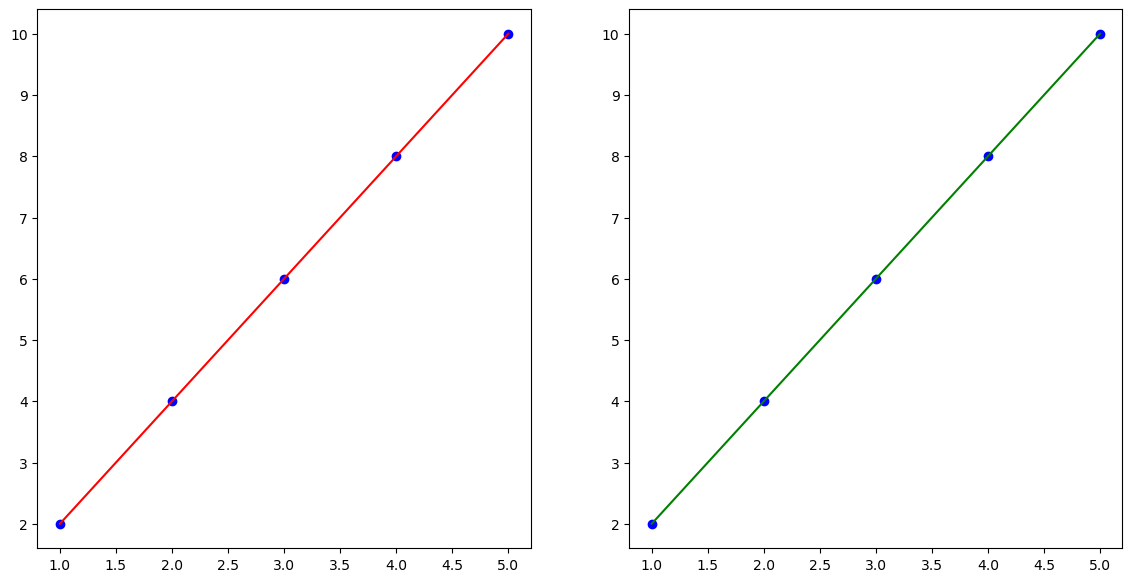

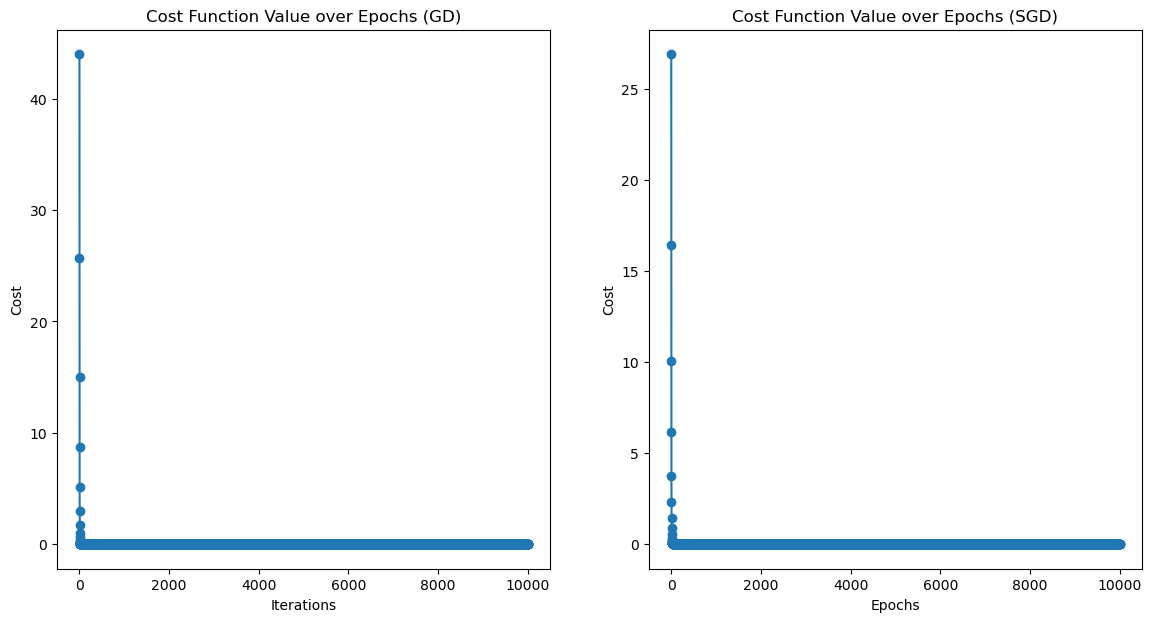

In [40]:
def mean_squared_error(y_true, y_pred):
    return sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))) / len(y_true)
X = dataset[0].tolist()
y = dataset[1].tolist()
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(14, 7))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

w1, w0, cost_history_sgd = stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=10000)
plt1.scatter(X, y, color='blue', label='Training Data')
plt1.plot(X, [w1 * x + w0 for x in X], color='red', label='Stochastic Gradient Descent')
ax2.plot(range(len(cost_history_sgd)), cost_history_sgd, label='Stochastic Gradient Descent', marker='o')
ax2.set_title('Cost Function Value over Epochs (SGD)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Cost')
y_pred = [w1 * x + w0 for x in X]
w1, w0, cost_history_gd = gradient_descent(X, y, learning_rate=0.01, epochs=10000)
plt2.scatter(X, y, color='blue', label='Training Data')
plt2.plot(X, [w1 * x + w0 for x in X], color='green', label='Gradient Descent')
ax1.plot(range(len(cost_history_gd)), cost_history_gd, label='Gradient Descent', marker='o')
ax1.set_title('Cost Function Value over Epochs (GD)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
y_pred = [w1 * x + w0 for x in X]
plt.show()

NameError: name 'X_train' is not defined